### Support Vector Regression

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\defence_stock_price.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       953 non-null    object 
 1   Open       953 non-null    float64
 2   High       953 non-null    float64
 3   Low        953 non-null    float64
 4   Close      953 non-null    float64
 5   Adj Close  953 non-null    float64
 6   Volume     953 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.2+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02
mean,97.150902,102.722452,92.379521,97.076971,90.204363,1.935141e+06
std,60.654891,64.173825,57.859788,60.778104,60.823523,2.796242e+06
min,23.200001,24.950001,21.966665,23.200001,19.980383,4.246500e+04
25%,43.733334,46.299999,41.833332,43.500000,38.378746,4.703090e+05
50%,95.000000,99.333336,88.500000,93.949997,84.911644,1.014542e+06
75%,122.500000,128.699997,116.250000,122.550003,113.598564,2.105121e+06
max,357.899994,374.500000,336.250000,356.700012,356.700012,2.876026e+07


In [5]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994999,0.996369,0.991361,0.987203,0.215374
High,0.994999,1.000000,0.995484,0.997601,0.992776,0.261554
Low,0.996369,0.995484,1.000000,0.995764,0.992416,0.221373
Close,0.991361,0.997601,0.995764,1.000000,0.995884,0.260382
Adj Close,0.987203,0.992776,0.992416,0.995884,1.000000,0.268798
Volume,0.215374,0.261554,0.221373,0.260382,0.268798,1.000000


In [6]:
df1 = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [7]:
df1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: ylabel='Open'>

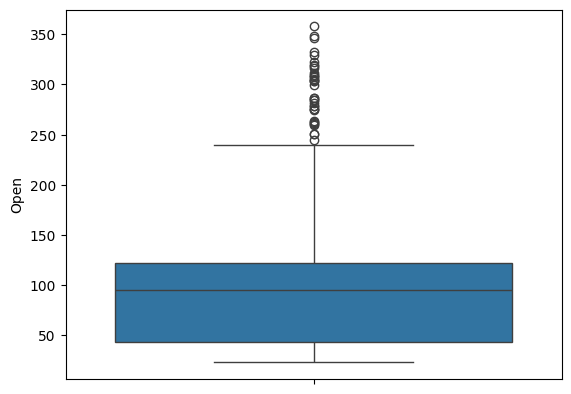

In [8]:
sns.boxplot(df1.Open)

<Axes: ylabel='Close'>

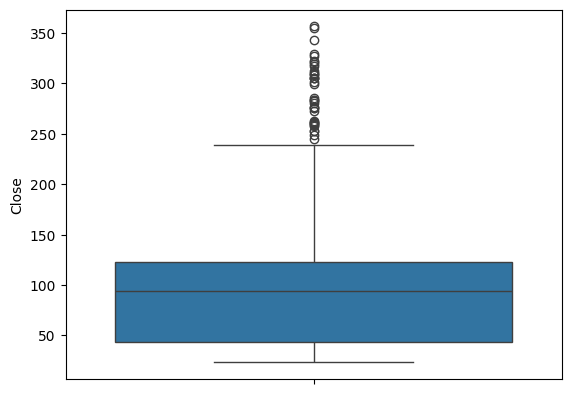

In [9]:
sns.boxplot(df1.Close)

<Axes: ylabel='High'>

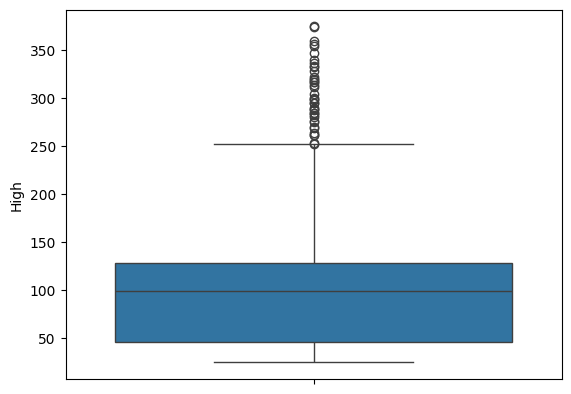

In [10]:
sns.boxplot(df1.High)

<Axes: ylabel='Low'>

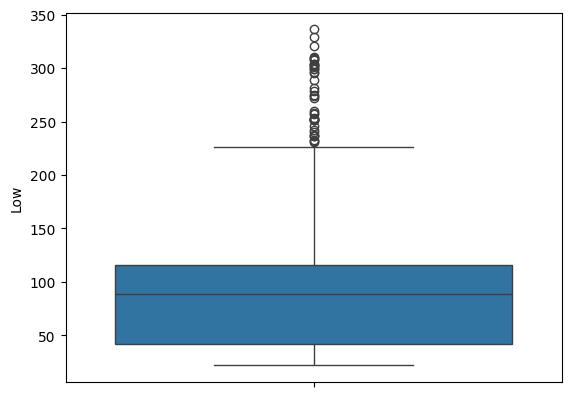

In [11]:
sns.boxplot(df1.Low)

<Axes: ylabel='Adj Close'>

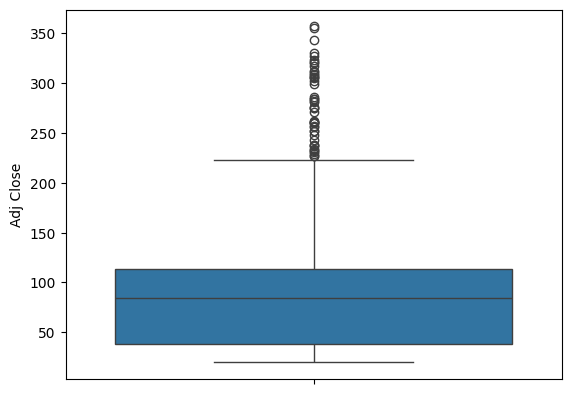

In [12]:
sns.boxplot(df1['Adj Close'])

<Axes: ylabel='Volume'>

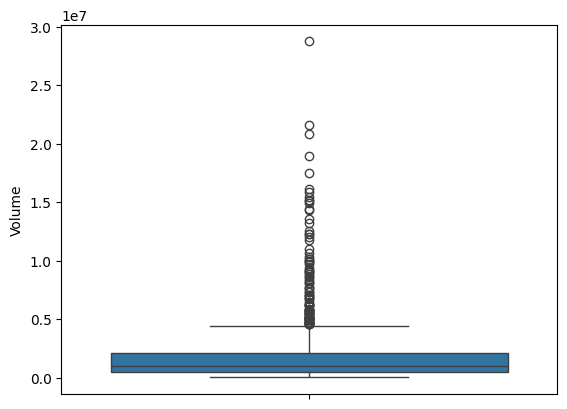

In [13]:
sns.boxplot(df1.Volume)

<Axes: ylabel='Open'>

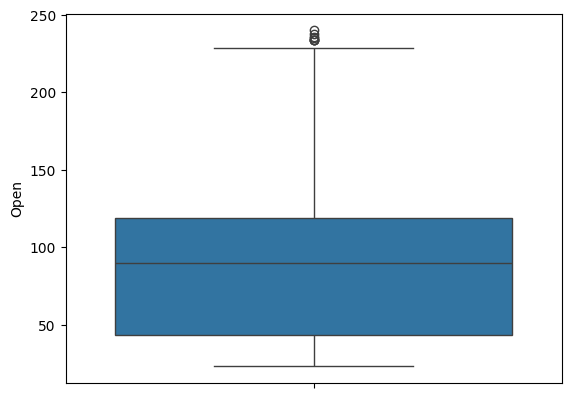

In [14]:
Q1 = df1['Open'].quantile(0.25)
Q3 = df1['Open'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['Open'] > l_limit) & (df1['Open'] < u_limit)]
sns.boxplot(df2['Open'])

<Axes: ylabel='Close'>

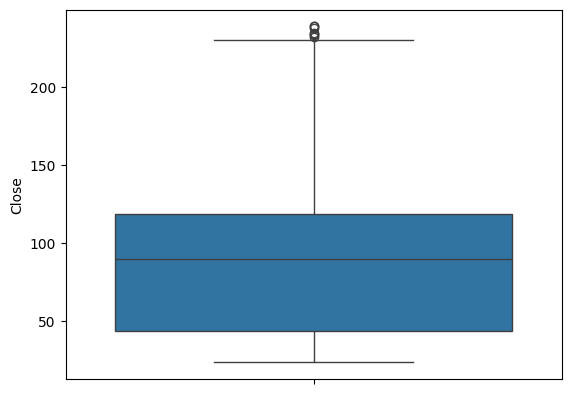

In [15]:
Q1 = df1['Close'].quantile(0.25)
Q3 = df1['Close'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['Close'] > l_limit) & (df1['Close'] < u_limit)]
sns.boxplot(df2['Close'])

<Axes: ylabel='High'>

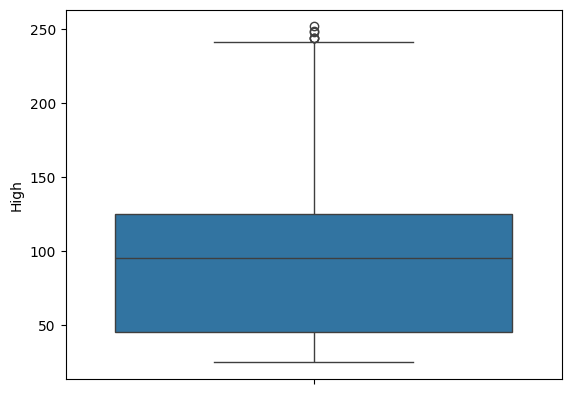

In [16]:
Q1 = df1['High'].quantile(0.25)
Q3 = df1['High'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['High'] > l_limit) & (df1['High'] < u_limit)]
sns.boxplot(df2['High'])

<Axes: ylabel='Low'>

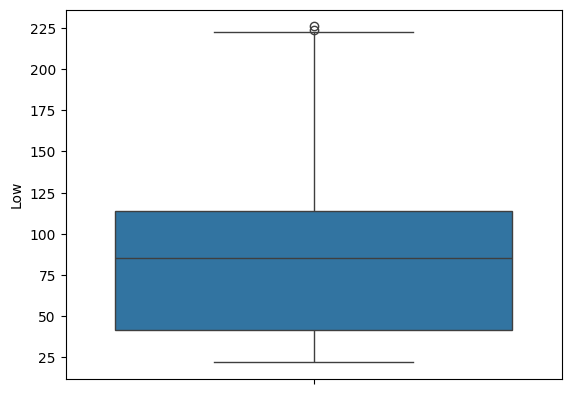

In [17]:
Q1 = df1['Low'].quantile(0.25)
Q3 = df1['Low'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['Low'] > l_limit) & (df1['Low'] < u_limit)]
sns.boxplot(df2['Low'])

<Axes: ylabel='Adj Close'>

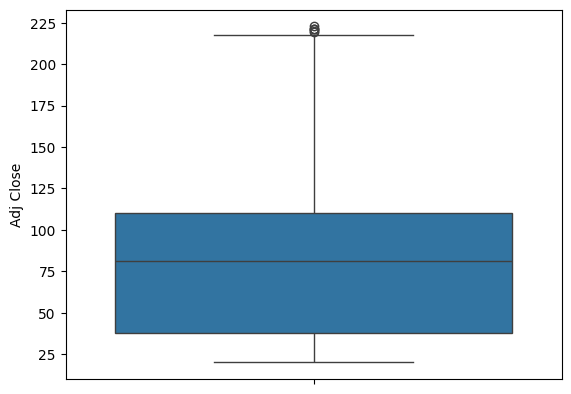

In [18]:
Q1 = df1['Adj Close'].quantile(0.25)
Q3 = df1['Adj Close'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['Adj Close'] > l_limit) & (df1['Adj Close'] < u_limit)]
sns.boxplot(df2['Adj Close'])

<Axes: ylabel='Volume'>

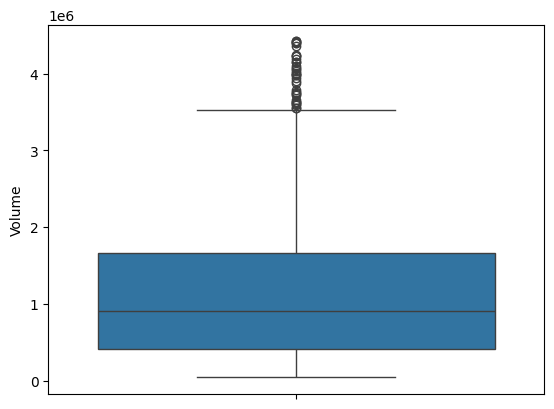

In [19]:
Q1 = df1['Volume'].quantile(0.25)
Q3 = df1['Volume'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['Volume'] > l_limit) & (df1['Volume'] < u_limit)]
sns.boxplot(df2['Volume'])

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 952
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       859 non-null    float64
 1   High       859 non-null    float64
 2   Low        859 non-null    float64
 3   Close      859 non-null    float64
 4   Adj Close  859 non-null    float64
 5   Volume     859 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [21]:
x = df2[['Close', 'High', 'Low', 'Adj Close', 'Volume']]
y = df2['Open']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
svm = SVR()
model = svm.fit(x_train, y_train)

In [24]:
y_pred = model.predict(x_test)

In [25]:
mean_squared_error(y_test, y_pred)

3816.6206068833662

In [26]:
r2_score(y_test, y_pred)

0.13592393474181474